### ML Project 1: BMW Price Prediction (P2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import libraries to build dp neural network
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense, Normalization
from keras.models import Sequential

## Problem Context

In this project, wer are working bmw dataset spefically focused on bmw series model to predict the car price based on given features to increase price accuracy. 

In [3]:
# load bmw dataset
bmw_data = pd.read_csv("bmw_numeric_dataset.csv", index_col=0)
bmw_data.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Automatic,Manual,Semi-Auto
0,5 Series,2014,11200,Automatic,67068,1,125,57.6,2.0,1,0,0
1,6 Series,2018,27000,Automatic,14827,2,145,42.8,2.0,1,0,0
2,5 Series,2016,16000,Automatic,62794,1,160,51.4,3.0,1,0,0
3,1 Series,2017,12750,Automatic,26676,1,145,72.4,1.5,1,0,0
4,7 Series,2014,14500,Automatic,39554,1,160,50.4,3.0,1,0,0


### Project Task List

+ Making feature correlation analysis to do a feature selection
+ Feature Scaling and Engineering
+ Preprocessing data using data normalisation
+ Building a neural network to do model training
+ Train and test the model using scikit-learn library
+ Evaluate model's performance and its accuracy

**ML Workflow**: 

EDA(Correlation Analysis) --> Data Preprocessing --> Model Building --> Model Training --> Model Selection --> Model Evaluation 

In [4]:
# identify bmw dataset
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10664 entries, 0 to 10780
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          10664 non-null  object 
 1   Year           10664 non-null  int64  
 2   Price          10664 non-null  int64  
 3   Transmission   10664 non-null  object 
 4   Mileage        10664 non-null  int64  
 5   Fuel_type      10664 non-null  int64  
 6   Tax            10664 non-null  int64  
 7   Fuel_cons_mpg  10664 non-null  float64
 8   Engine_size    10664 non-null  float64
 9   Automatic      10664 non-null  int64  
 10  Manual         10664 non-null  int64  
 11  Semi-Auto      10664 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
# identify bmw models
bmw_data["Model"].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [6]:
# focus on retrieving bmw series models
bmw_series = bmw_data["Model"].str.contains("Series")
bmw_series = bmw_data[bmw_series]
bmw_series

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Automatic,Manual,Semi-Auto
0,5 Series,2014,11200,Automatic,67068,1,125,57.6,2.0,1,0,0
1,6 Series,2018,27000,Automatic,14827,2,145,42.8,2.0,1,0,0
2,5 Series,2016,16000,Automatic,62794,1,160,51.4,3.0,1,0,0
3,1 Series,2017,12750,Automatic,26676,1,145,72.4,1.5,1,0,0
4,7 Series,2014,14500,Automatic,39554,1,160,50.4,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10772,1 Series,2017,10200,Manual,41435,1,0,83.1,1.5,0,1,0
10774,5 Series,2016,14300,Automatic,67530,1,30,62.8,2.0,1,0,0
10777,5 Series,2016,14600,Automatic,42947,1,125,60.1,2.0,1,0,0
10778,3 Series,2017,13100,Manual,25468,2,200,42.8,2.0,0,1,0


In [7]:
# retrieve shape of dataset
m,n = bmw_series.shape
print(f"Number of BMW Series Samples: {m}")
print(f"Number of BMW Model Characteristics: {n}")

Number of BMW Series Samples: 7874
Number of BMW Model Characteristics: 12


### Correlation Analysis

In [8]:
def correlation_analysis(auto_data,x,y):
  # create a correlation map
  auto_labels = ["Transmission", "Model"]
  auto_num = auto_data.drop(columns=auto_labels, axis=1)
  auto_corr = auto_num.corr()
  

  # create a heatmap to display correlation among features
  plt.figure(figsize=(x,y), dpi=80)
  sns.heatmap(auto_corr, annot=True)
  
  # add graph details

  # display the heatmap 
  plt.show()

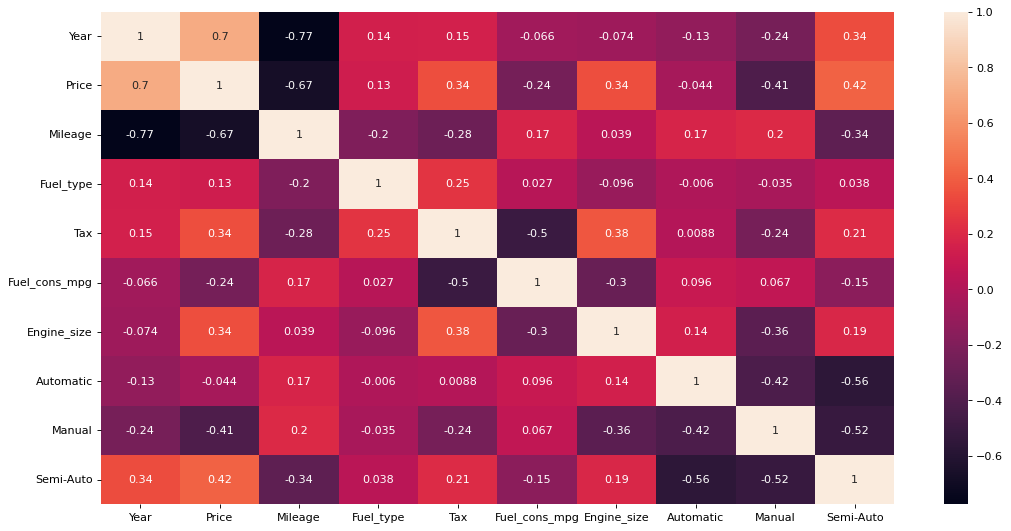

In [9]:
# create correlation map
correlation_analysis(bmw_series, 16,8)

Features for training the model: 
+ predictors: Mileage, Fueltype, Tax, Fuel_cons_mpg, Engine_size
+ target: Price
+ binary values: automatic, manual, semi-auto

### Model Training

Consider the feature mileage and fuelconsumption to predict the price value. 

In [10]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [11]:
bmw_series.columns

Index(['Model', 'Year', 'Price', 'Transmission', 'Mileage', 'Fuel_type', 'Tax',
       'Fuel_cons_mpg', 'Engine_size', 'Automatic', 'Manual', 'Semi-Auto'],
      dtype='object')

In [12]:
# retrieve mileage and fuel consumption to train data
in_features = bmw_series[["Mileage","Fuel_cons_mpg", "Engine_size","Manual"]]
out_feature = bmw_series["Price"]

xtrain_bmw, ytrain_bmw, xtest_bmw, ytest_bmw = train_test_split(in_features, out_feature, test_size=0.25, random_state=1234)

In [13]:
# normalise dataset using Normalisation 
normalizer = Normalization()
# normalizer.adapt(xtrain_bmw)

In [23]:
# train the features 
def normalise_feature(feature, name):
  # determine statistics
  feature_mean = feature[name].mean()
  feature_std = feature[name].std()

  # determine z score
  feature_z = (feature[name] - feature_mean)/feature_std
  return feature_z

# normalise feature data
in_features["Mileage"].transform(normalise_feature)


In [35]:
in_feature_norm = in_features.copy()
in_feature_norm["Mileage"] = normalise_feature(xtrain_bmw, "Mileage")
in_feature_norm["Fuel_cons_mpg"] = normalise_feature(in_features, "Fuel_cons_mpg")
in_feature_norm["Engine_size"] = normalise_feature(in_features, "Engine_size")
# normalise_feature(in_features, "Mileage")

In [36]:
in_feature_norm

,Mileage,Fuel_cons_mpg,Engine_size,Manual
0,1.560254,0.009360,-0.210406,0
1,-0.480286,-0.850012,-0.210406,0
2,1.393311,-0.350647,1.784943,0
3,-0.017463,0.868731,-1.208081,0
4,0.485554,-0.408713,1.784943,0
...,...,...,...,...
10772,0.559026,1.490033,-1.208081,1
10774,1.578300,0.311301,-0.210406,0
10777,0.618085,0.154524,-0.210406,0
10778,-0.064647,-0.850012,-0.210406,1


In [ ]:
# build a neural network model
def neural_network_model(in_features):
  # build a neural network model
  n_features = in_features.shape[1]
  model = Sequential()

  # add layers
  